# Decision Trees

<img src = "data/1.png">

<img src = "data/DT1.png">

<img src = "data/DT2.png">

<img src = "data/DT3.png">

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('data/iris.csv')

In [3]:
print(iris.shape)

(150, 6)


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

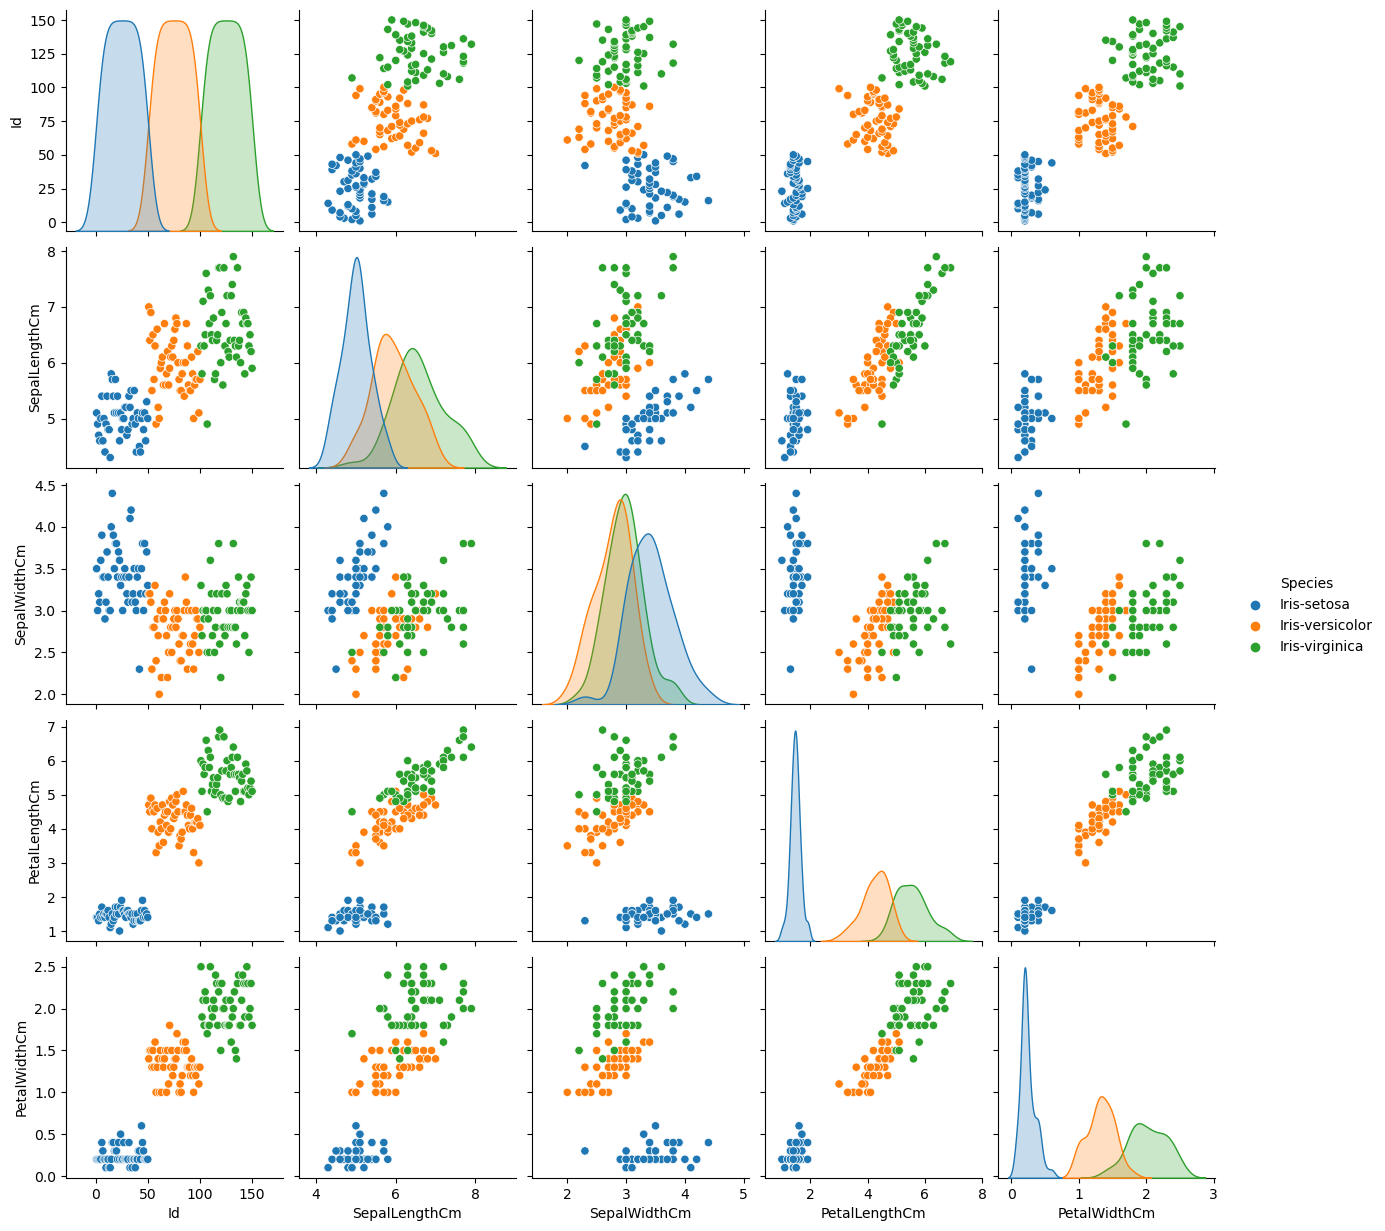

In [5]:
sns.pairplot(iris, hue = 'Species')

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

### Test Train Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

### Training

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### Prediction

In [10]:
y_test_pred = classifier.predict(X_test)

### Measuring Performance

#### Accuracy

In [11]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8947368421052632

#### Confusion Metric

In [12]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  3,  6]], dtype=int64)

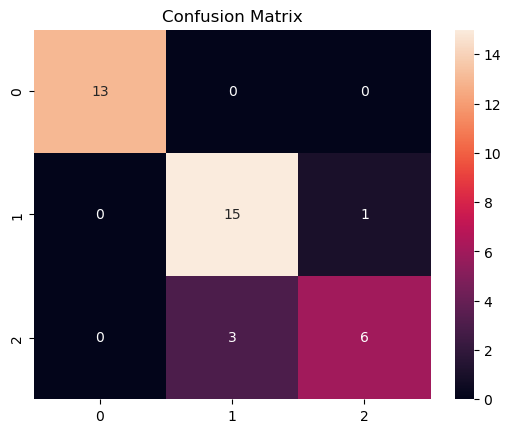

In [13]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Visualizing the Model

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

f = plot_tree(classifier, feature_names = X_train.columns, 
              class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

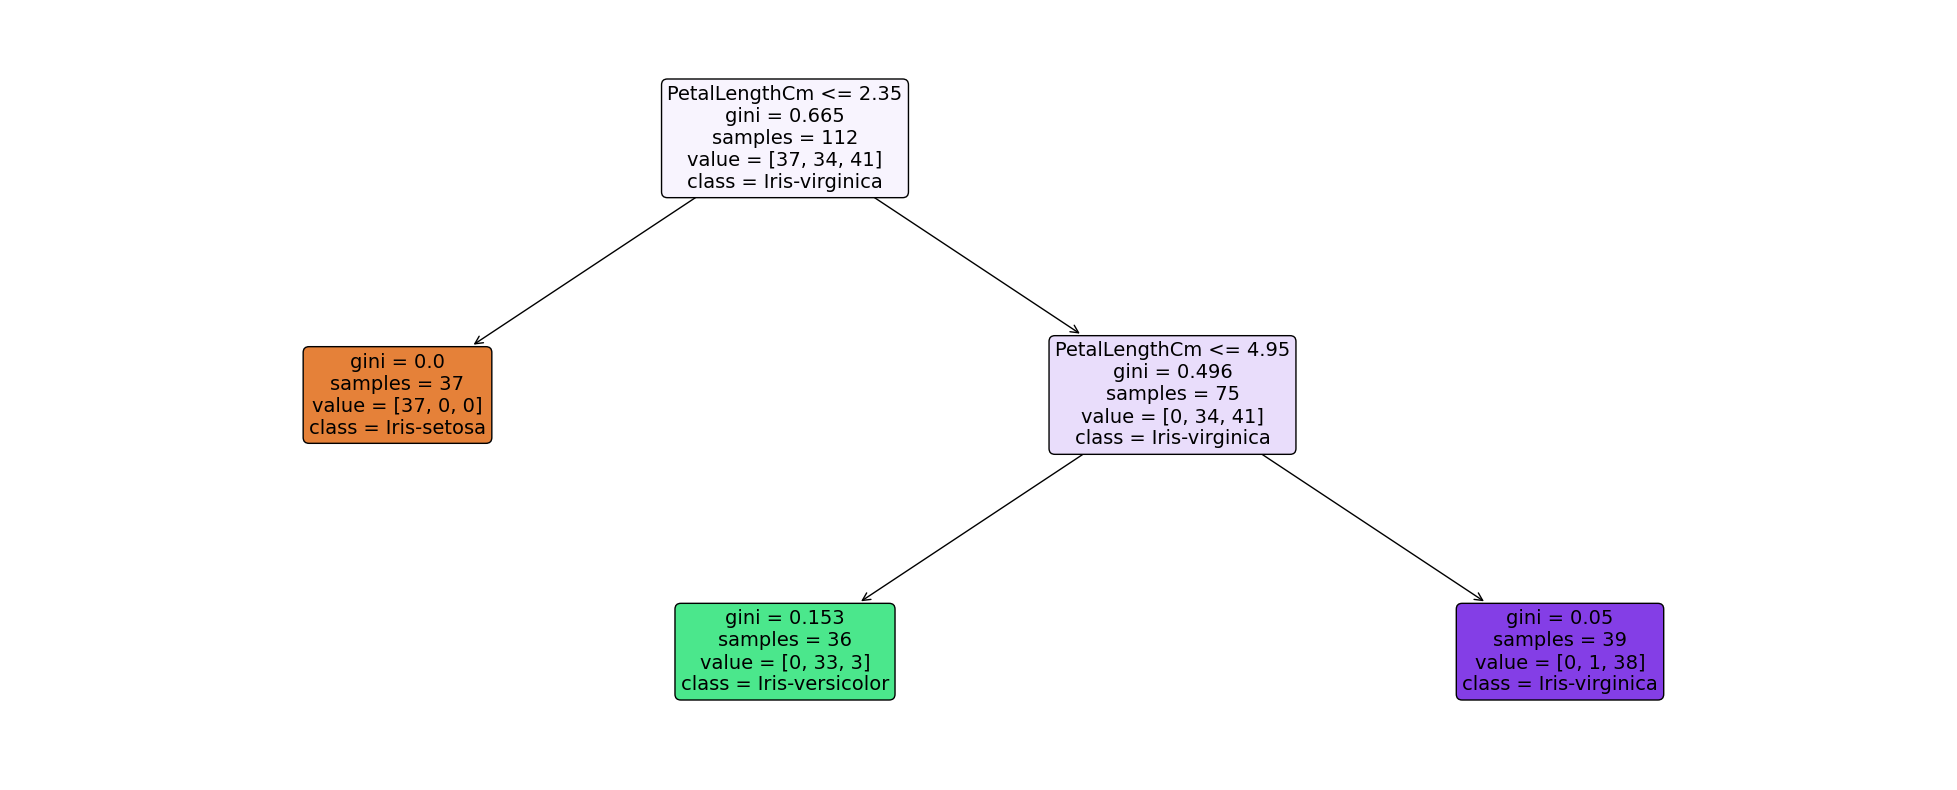

In [21]:
plt.show()

### Feature Importance

In [18]:
classifier.feature_importances_

array([0., 0., 1., 0.])

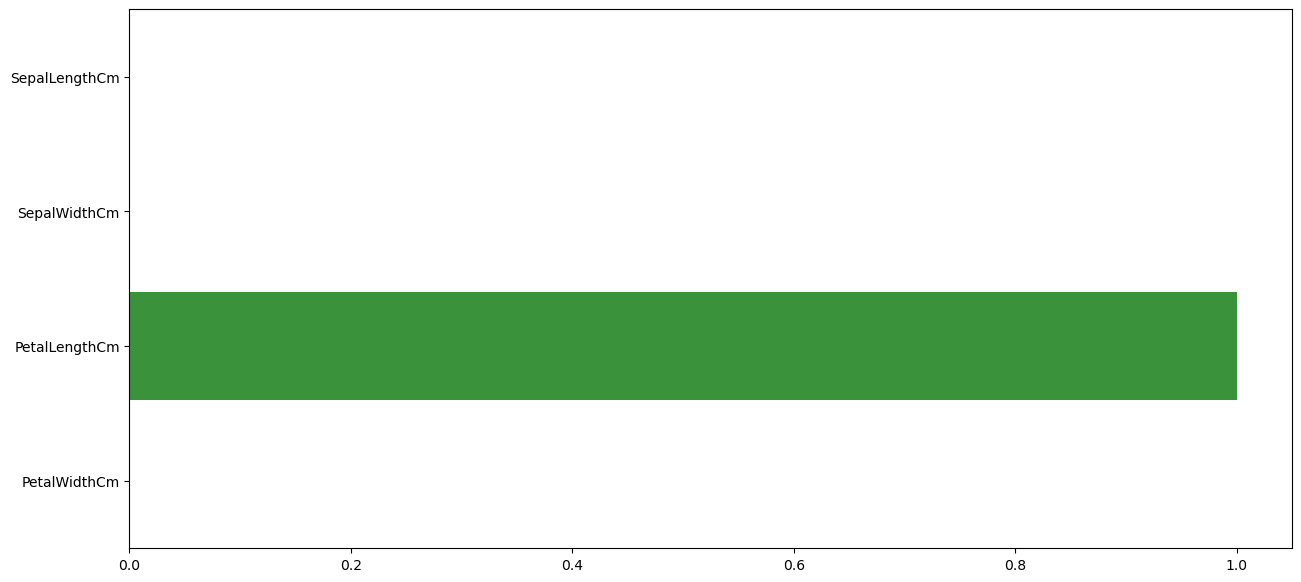

In [19]:
plt.figure(figsize=(15,7))

sns.barplot(x = classifier.feature_importances_, y = X_train.columns)

plt.show()